In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('../input/data-classified/classified_data.csv',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [7]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [8]:
from sklearn.model_selection import train_test_split

X=df_feat
y=df['TARGET CLASS']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [10]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [11]:
pred= knn.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [13]:
error_rate=[]
for i in range(300,320):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'error rate')

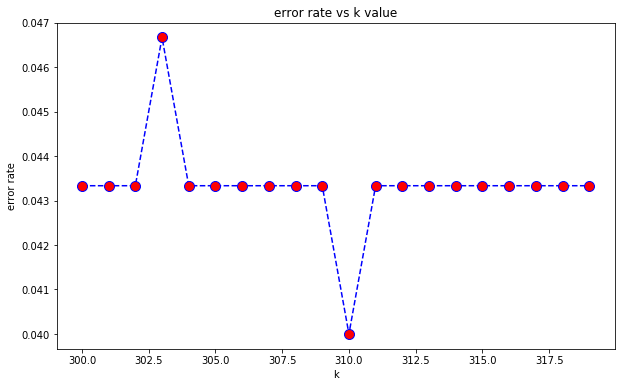

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(300,320),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('error rate vs k value')
plt.xlabel('k')
plt.ylabel('error rate')


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=310)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

[[150   3]
 [  9 138]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       153
           1       0.98      0.94      0.96       147

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [17]:
####################################################################################################################

In [18]:
#Titanic applying KNN

In [19]:
train=pd.read_csv('../input/titanic/train.csv')
test=pd.read_csv('../input/titanic/test.csv')

In [20]:
def impute(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

train['Age']=train[['Age','Pclass']].apply(impute,axis=1)

In [21]:
train.drop('Cabin',axis=1,inplace=True)

In [22]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)
train=pd.concat([train,sex,embark],axis=1)

In [23]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [24]:
def impute1(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 26
        else:
            return 23
    else:
        return Age

test['Age']=test[['Age','Pclass']].apply(impute1,axis=1)

In [25]:
test.drop('Cabin',axis=1,inplace=True)
test['Fare'].loc[152]=np.mean(test['Fare'])

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [26]:
sex=pd.get_dummies(test['Sex'],drop_first=True)
embark=pd.get_dummies(test['Embarked'],drop_first=True)
test=pd.concat([test,sex,embark],axis=1)

In [27]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(train.drop('Survived',axis=1))
scaled_features1 = scaler.transform(train.drop('Survived',axis=1))

scaler.fit(test)
scaled_features2 = scaler.transform(test)

In [29]:
train_feat=pd.DataFrame(scaled_features1,columns=train.columns.drop('Survived'))
test_feat=pd.DataFrame(scaled_features2,columns=test.columns)

In [30]:
X=train_feat
y=train['Survived']

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
pred=knn.predict(test_feat)

In [32]:
def createList(r1,r2):
    return [item for item in range(r1,r2)]
PassengerId=createList(892,1310)
PassengerId=pd.DataFrame({'':PassengerId}).rename(columns={'':'PassengerId'})
PassengerId
Survived=pd.DataFrame({'':list(pred)})

In [33]:
Survived=pd.DataFrame({'':list(pred)}).rename(columns={'':'Survived'})
Survived

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [34]:
result=pd.concat([PassengerId,Survived],axis=1)

In [35]:
result.to_csv('titanic_mark1.csv',index=False)